# Setup

In [1]:
import ccfrag
from pathlib import Path

# Creating queries for ColabFold

In [2]:
# this is the fasta file that contains the sequence we want to model piece-wise
path_input_fasta = Path('MYOSIN.fasta')

# this is where the sub-strings, the models, and the results will be stored
path_output = Path('CCfrag_constructs_MYOSIN')

# this is a safety flag; the program will fail if the folders already do exist (defaults to 'False')
# it is useful to set it to 'True' to run this notebook with its pre-existing data
overwrite = True

In [3]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [2]:
		divider = ccfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(path_input_fasta, path_output,
                                 format='single_line_fasta', overwrite=overwrite)

>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)
>MYOSIN 6XE9_1|Chains A, D[auth M]|Myosin II heavy chain (smooth muscle)|Meleagris gallopavo (9103)


# Running ColabFold_batch

In [4]:
%%bash

cd CCfrag_constructs_MYOSIN/MYOSIN
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
    echo $i
    cd $ROOT_FOLDER
    cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
    colabfold_batch queries predictions --num-recycle=5

done

2_20_10/
2_30_15/
2_50_25/
2_70_35/


In [5]:
!du -h -d 1 | grep CCfrag

668M	./CCfrag_constructs_MYOSIN


# Analyzing data with CCfrag integrator

In [6]:
import matplotlib.pyplot as plt

In [7]:
integrator = ccfrag.Integrator(path_fragments='CCfrag_constructs_MYOSIN/MYOSIN/',
                               list_features=['plddt', 'para', 'kih', 'pae'],
                               data_output='DATA_CCfrag.csv')

In [8]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of MYOSIN ...
MYOSIN read as a sequence of length 1979
Found 4 specification folders:
* 2_20_10/
* 2_30_15/
* 2_50_25/
* 2_70_35/


In [9]:
df_data_sequence

,residue_name,residue_number,2_20_10_plddt,2_20_10_para,2_20_10_kih,2_20_10_pae,2_30_15_plddt,2_30_15_para,2_30_15_kih,2_30_15_pae,2_50_25_plddt,2_50_25_para,2_50_25_kih,2_50_25_pae,2_70_35_plddt,2_70_35_para,2_70_35_kih,2_70_35_pae
0,M,0,32.160,0.0,0.0,11.480919,39.200,0.0,0.0,11.966439,35.4050,1.0,0.0,13.961986,41.860,0.0,0.0,15.712832
1,S,1,37.160,0.0,0.0,11.480919,42.050,0.0,0.0,11.966439,36.0150,1.0,0.0,13.961986,50.390,0.0,0.0,15.712832
2,Q,2,44.910,0.0,0.0,11.480919,50.640,0.0,0.0,11.966439,39.6550,1.0,0.0,13.961986,53.190,0.0,0.0,15.712832
3,K,3,52.285,0.0,0.0,11.480919,52.235,0.0,0.0,11.966439,40.8600,1.0,0.0,13.961986,59.705,0.0,0.0,15.712832
4,P,4,52.535,0.0,0.0,11.480919,57.435,0.0,0.0,11.966439,45.4700,1.0,0.0,13.961986,60.015,0.0,0.0,15.712832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974,G,1974,40.720,0.0,0.0,12.855406,35.420,1.0,0.0,15.288353,28.2675,0.5,0.0,23.211847,37.030,1.0,0.0,21.903271
1975,K,1975,37.940,0.0,0.0,12.855406,32.300,1.0,0.0,15.288353,28.8050,0.0,0.0,23.384424,39.580,1.0,0.0,21.903271
1976,A,1976,38.405,0.0,0.0,12.855406,31.630,1.0,0.0,15.288353,28.4800,0.0,0.0,23.384424,41.300,1.0,0.0,21.903271
1977,S,1977,39.265,0.0,0.0,12.855406,32.145,1.0,0.0,15.288353,25.6950,0.0,0.0,23.384424,37.140,1.0,0.0,21.903271


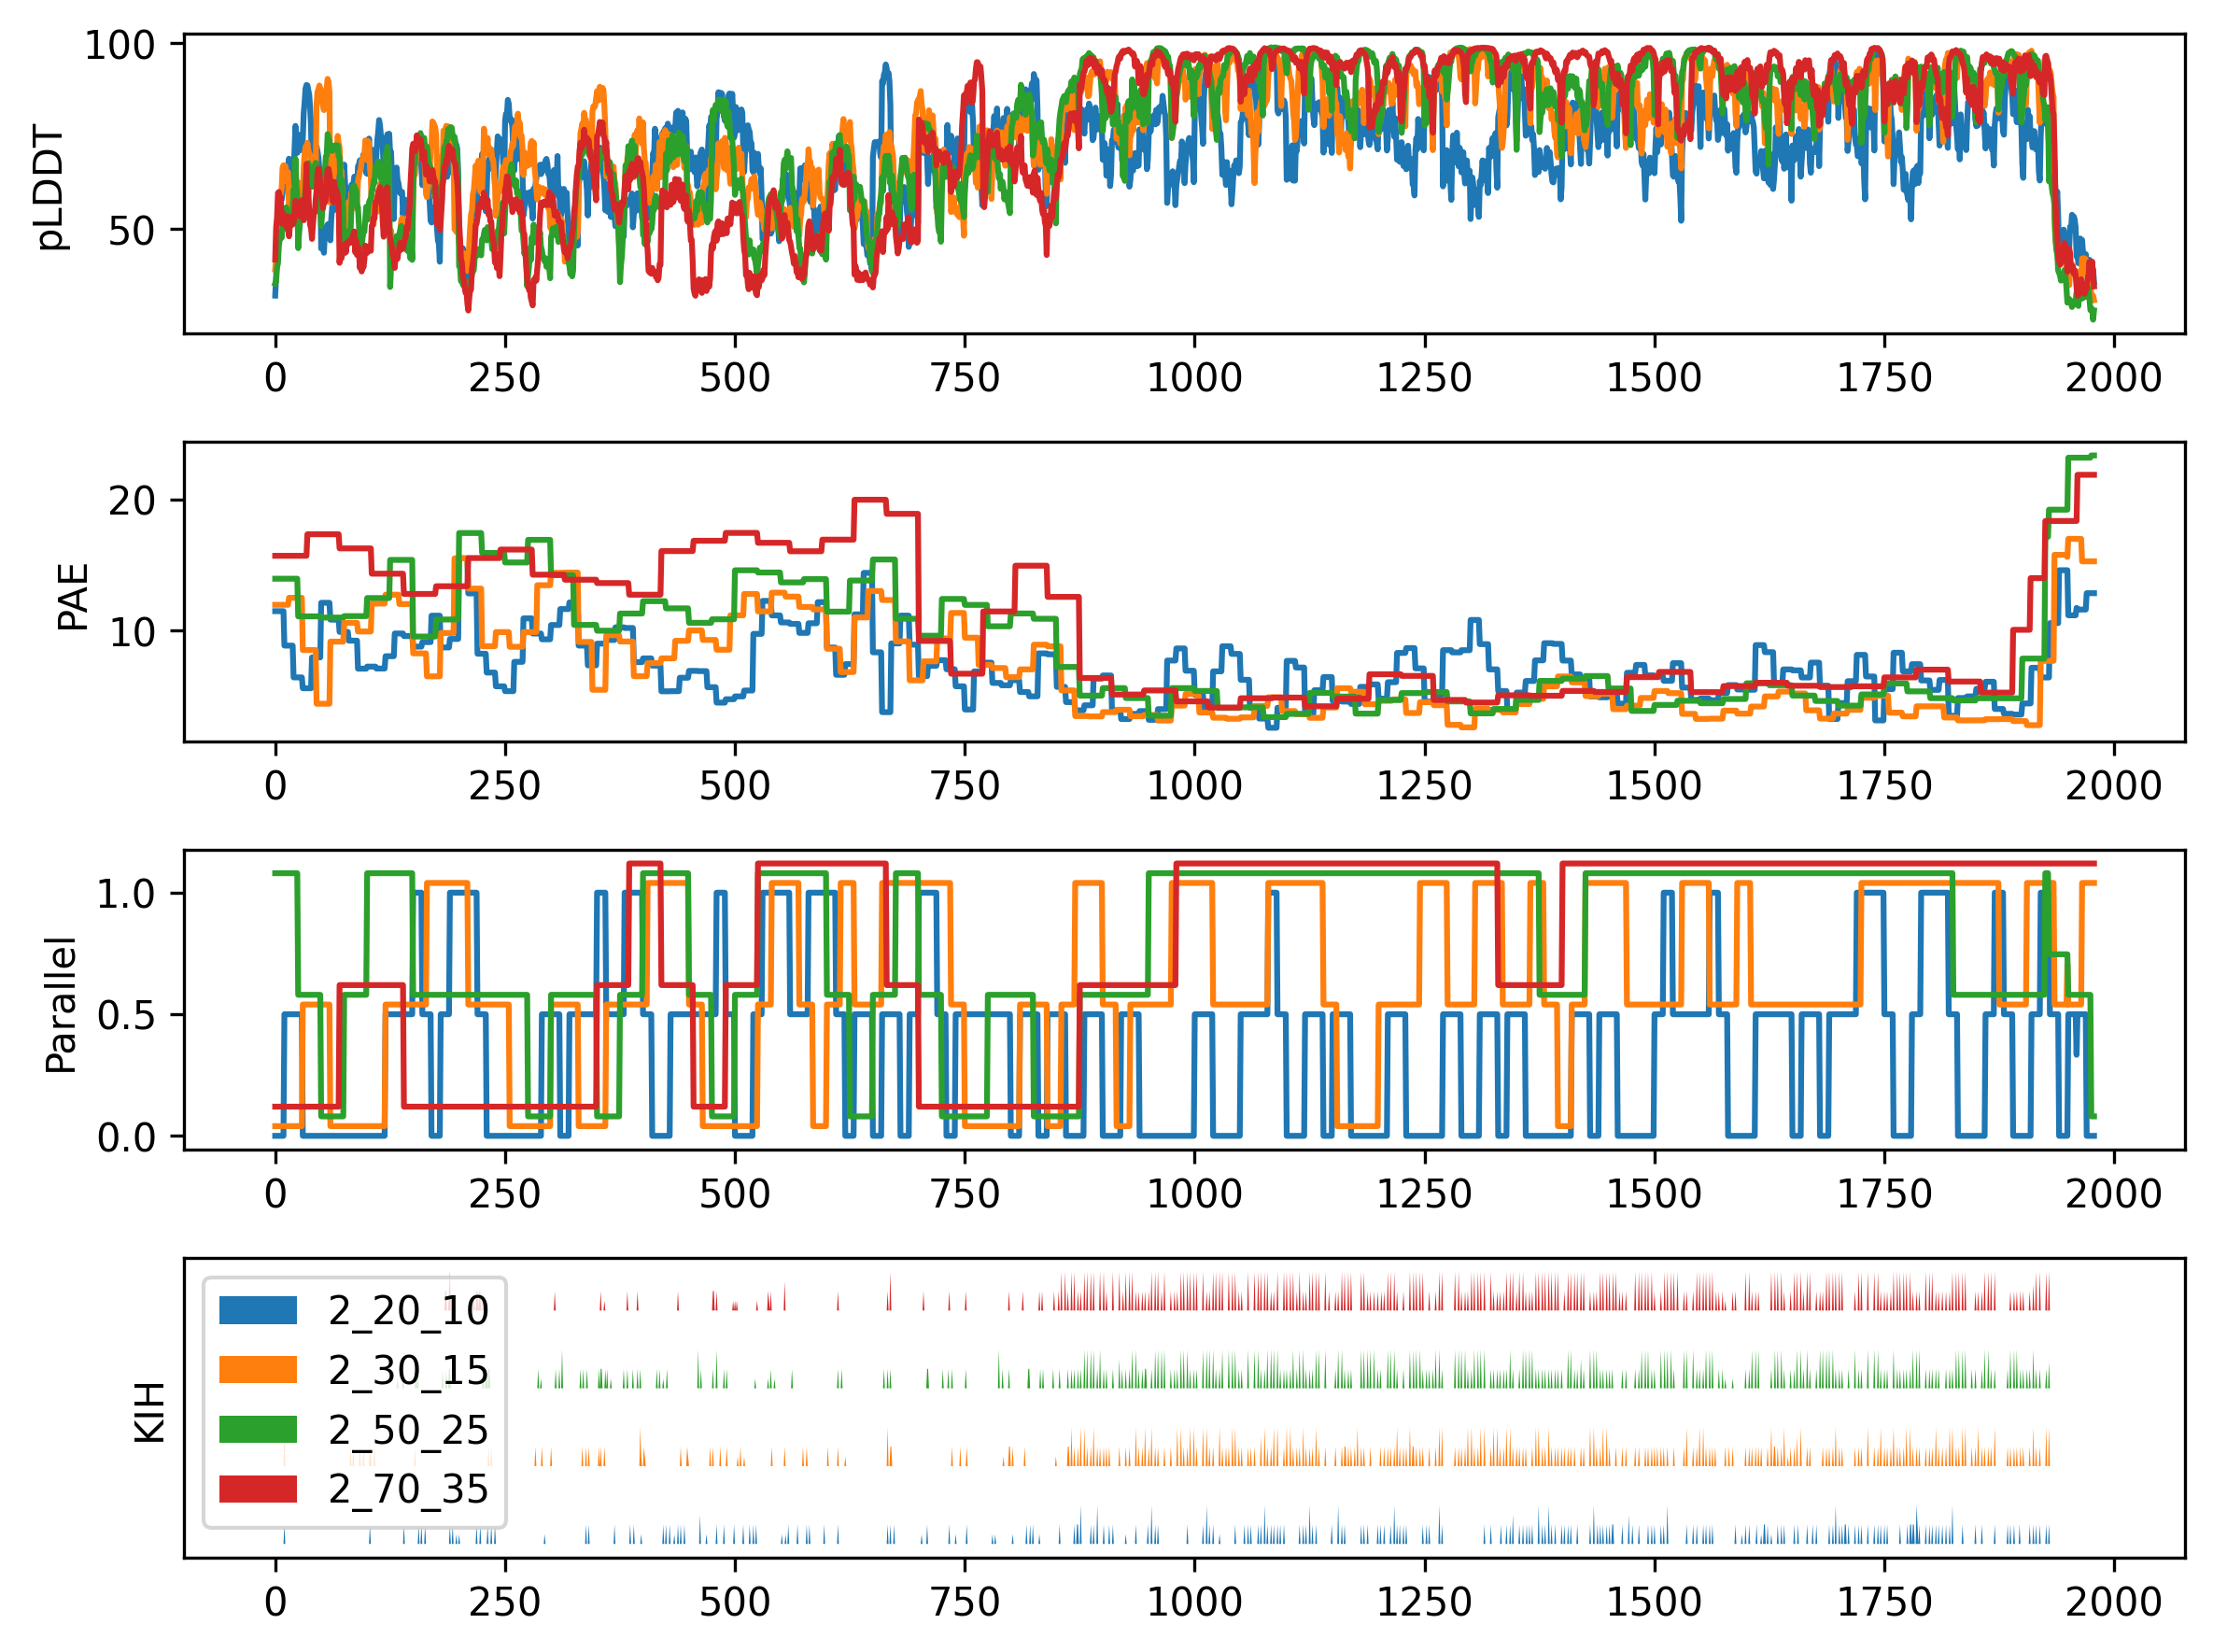

In [10]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend(loc='upper left')
plt.tight_layout()